## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")

model = load_model('protopnet', checkpoint_path, device=device)
img_size = 224

fatal: destination path 'ProtoPNet' already exists and is not an empty directory.


# Decorrelation

std: 0.01 | decay_power: 1 | sigmoid: True
step: 0/500, loss: 12.19094467163086


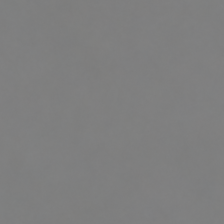

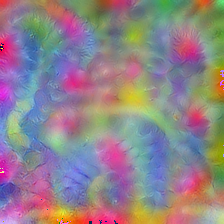

std: 0.01 | decay_power: 1 | sigmoid: False
step: 0/500, loss: 11.607549667358398


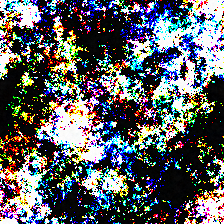

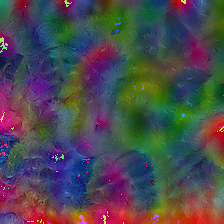

std: 0.01 | decay_power: 1.5 | sigmoid: True
step: 0/500, loss: 12.191964149475098


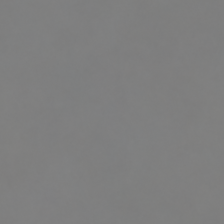

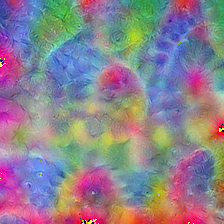

std: 0.01 | decay_power: 1.5 | sigmoid: False
step: 0/500, loss: 11.600188255310059


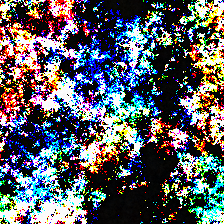

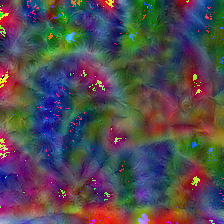

std: 0.01 | decay_power: 2 | sigmoid: True
step: 0/500, loss: 12.202507019042969


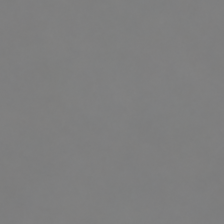

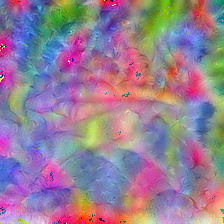

std: 0.01 | decay_power: 2 | sigmoid: False
step: 0/500, loss: 11.553380966186523


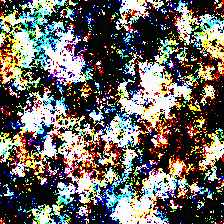

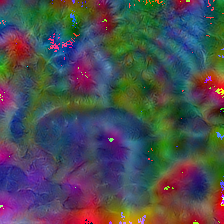

std: 0.1 | decay_power: 1 | sigmoid: True
step: 0/500, loss: 13.47971248626709


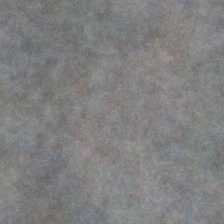

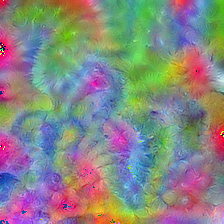

std: 0.1 | decay_power: 1 | sigmoid: False
step: 0/500, loss: 11.97305965423584


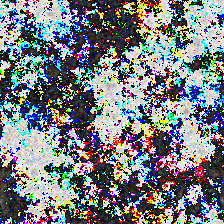

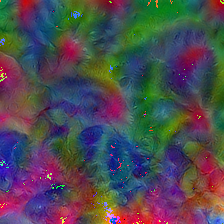

std: 0.1 | decay_power: 1.5 | sigmoid: True
step: 0/500, loss: 13.332483291625977


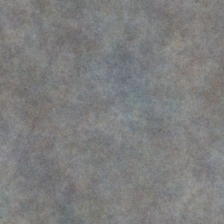

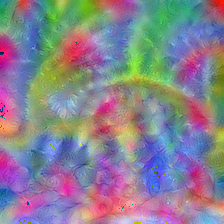

std: 0.1 | decay_power: 1.5 | sigmoid: False
step: 0/500, loss: 11.188432693481445


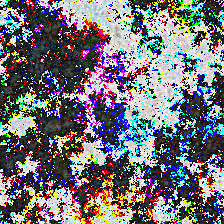

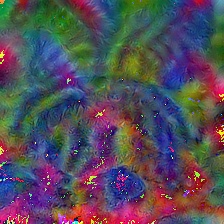

std: 0.1 | decay_power: 2 | sigmoid: True
step: 0/500, loss: 13.504583358764648


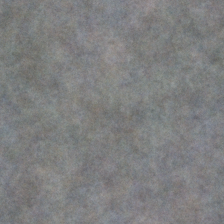

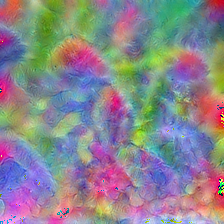

std: 0.1 | decay_power: 2 | sigmoid: False
step: 0/500, loss: 11.378499031066895


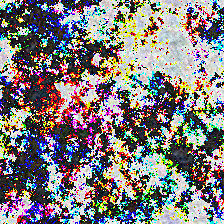

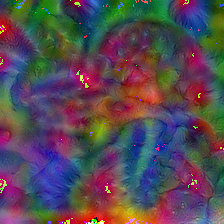

std: 1.0 | decay_power: 1 | sigmoid: True
step: 0/500, loss: 11.205855369567871


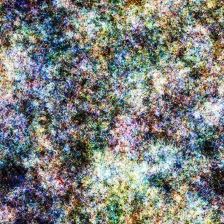

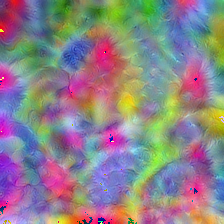

std: 1.0 | decay_power: 1 | sigmoid: False
step: 0/500, loss: 9.137459754943848


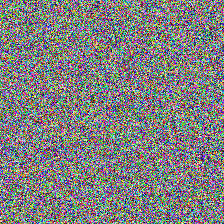

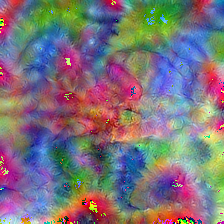

std: 1.0 | decay_power: 1.5 | sigmoid: True
step: 0/500, loss: 10.858109474182129


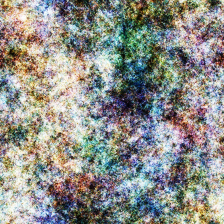

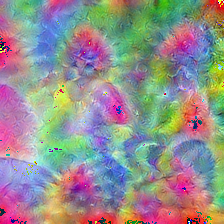

std: 1.0 | decay_power: 1.5 | sigmoid: False
step: 0/500, loss: 8.956703186035156


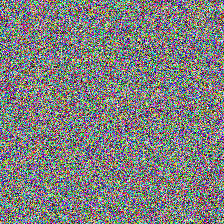

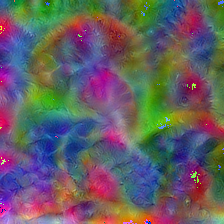

std: 1.0 | decay_power: 2 | sigmoid: True
step: 0/500, loss: 11.555405616760254


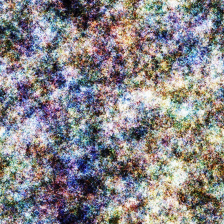

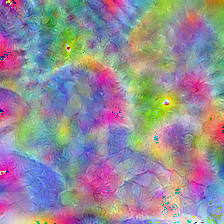

std: 1.0 | decay_power: 2 | sigmoid: False
step: 0/500, loss: 9.295968055725098


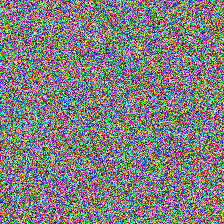

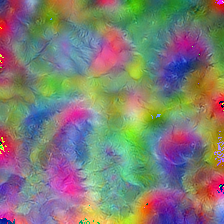

std: 2.0 | decay_power: 1 | sigmoid: True
step: 0/500, loss: 11.565263748168945


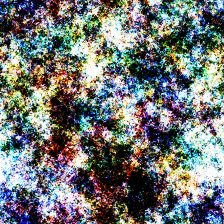

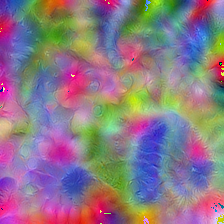

std: 2.0 | decay_power: 1 | sigmoid: False
step: 0/500, loss: 4.390418529510498


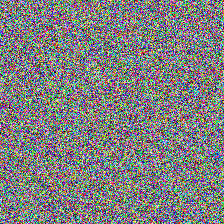

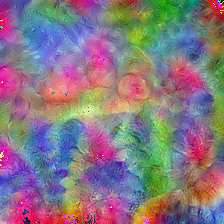

std: 2.0 | decay_power: 1.5 | sigmoid: True
step: 0/500, loss: 11.329444885253906


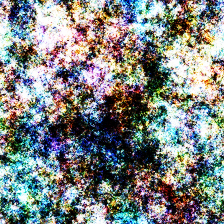

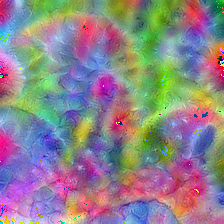

std: 2.0 | decay_power: 1.5 | sigmoid: False
step: 0/500, loss: 4.372310161590576


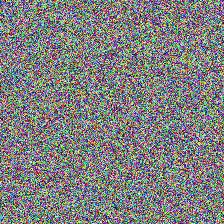

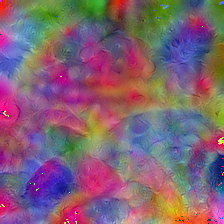

std: 2.0 | decay_power: 2 | sigmoid: True
step: 0/500, loss: 10.943102836608887


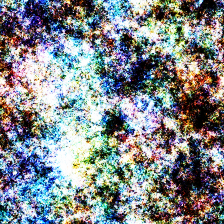

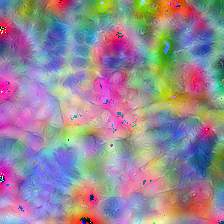

std: 2.0 | decay_power: 2 | sigmoid: False
step: 0/500, loss: 4.886282920837402


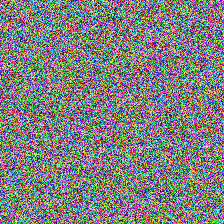

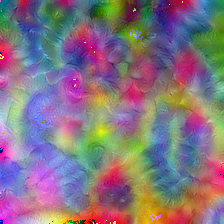

In [6]:
ptypes = [(188,1)]

def before_optim_step(t):
    tt = torch.clamp(t, 0, 1)
    t.data = tfs.GaussianBlur(7, 2)(tt).data

size = (3, 224, 224)
for std in [0.01, 0.1, 1.0, 2.0]:
    for decay_power in [1, 1.5, 2]:
        for sigmoid in [True, False]:
            print(f"std: {std} | decay_power: {decay_power} | sigmoid: {sigmoid}")
            generator = DecorrelatedImagesGenerator(
                std=std,
                decay_power=decay_power,
                sigmoid=sigmoid
            )
            input_tensor = generator.generate() 
            loss_agg_fn = AggregationFn().to(device)
            image = visualize_prototypes(model, ptypes, loss_agg_fn=loss_agg_fn, optimization_steps=500, input_tensor=input_tensor,
                             before_optim_step=before_optim_step, optimizer_kwargs={'lr': 0.2}, print_interval=500)
            pilimg = tfs.ToPILImage()(image)
            display(pilimg)